In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
#dataset courtesy of Kaggle: "https://www.kaggle.com/uciml/mushroom-classification"

df = pd.read_csv(r"C:\Users\bryan\Desktop\datasets\mushrooms.csv")

In [34]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [35]:
from sklearn.decomposition import PCA

In [36]:
pca = PCA(n_components=2)

In [37]:
from sklearn.preprocessing import LabelEncoder

Encoder_X = LabelEncoder() 

for col in df.columns:
    df[col] = Encoder_X.fit_transform(df[col])

In [38]:
x_pca = pca.fit_transform(df)

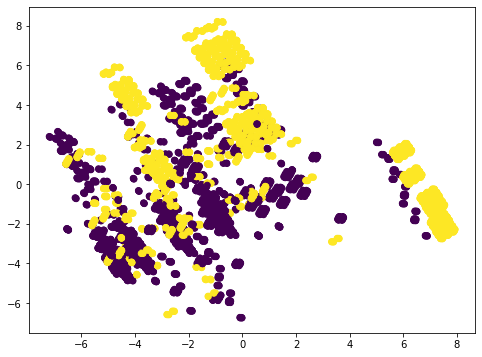

In [85]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1], c=df['class'])

In [40]:
#The PCA plot above shows us that the data is relatively lienarly seperable, which means Linear Descriminate Analysis might be a good model to test.

In [41]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [42]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [43]:
y = df['class']
X = df.drop('class', axis=1)

In [44]:
from sklearn.preprocessing import LabelEncoder

Encoder_X = LabelEncoder() 

for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()

y = Encoder_y.fit_transform(y)

In [45]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


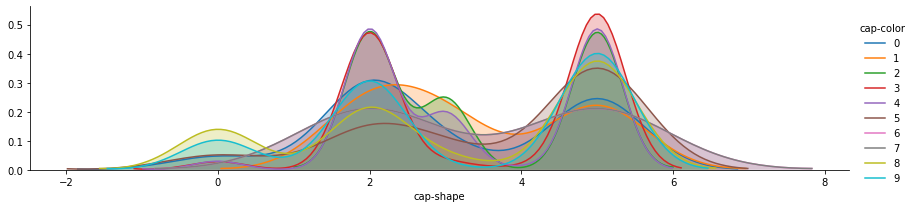

In [46]:
#visualizing age and sex
fig = sns.FacetGrid(data=X, hue='cap-color',aspect=4)
fig.map(sns.kdeplot,'cap-shape',shade=True)
fig.add_legend()

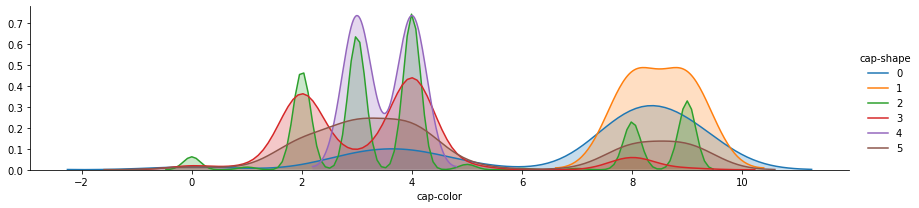

In [47]:
#visualizing age and sex
fig = sns.FacetGrid(data=X, hue='cap-shape',aspect=4)
fig.map(sns.kdeplot,'cap-color',shade=True)
fig.add_legend()

(array([4208.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3916.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

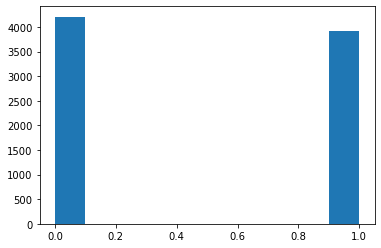

In [48]:
plt.hist(y)

In [49]:
Encoder_y.classes_

array([0, 1])

In [50]:
Encoder_X.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [51]:
y

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30)

# Test 1: Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log_reg = LogisticRegression()

In [56]:
log_reg.fit(X_test, y_test)

C:\Users\bryan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [57]:
y_pred = log_reg.predict(X_test)

In [58]:
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [59]:
from sklearn.metrics import classification_report

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1289
           1       0.95      0.93      0.94      1149

    accuracy                           0.95      2438
   macro avg       0.95      0.94      0.94      2438
weighted avg       0.95      0.95      0.94      2438



# Test 2: Linear Discriminant Analysis

In [61]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [62]:
lin_des = LinearDiscriminantAnalysis()

In [63]:
lin_des.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [64]:
y_pred2 = lin_des.predict(X_test)

In [65]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1289
           1       0.95      0.91      0.93      1149

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438



# Test 3: Support Vector Machine

In [66]:
from sklearn import svm

classifier = svm.SVC(kernel='linear', gamma='auto',probability=True)
classifier.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear', probability=True)

In [67]:
ypred3 = classifier.predict(X_test)

In [68]:
from sklearn.metrics import classification_report


print(classification_report(y_test, ypred3))


from sklearn.metrics import confusion_matrix


confusion_matrix(y_test, ypred3)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1289
           1       0.98      0.95      0.96      1149

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



array([[1265,   24],
       [  59, 1090]], dtype=int64)

# Test 4: Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier2.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [79]:
ypred4 = classifier2.predict(X_test)

In [80]:
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred4))

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ypred4)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1289
           1       1.00      1.00      1.00      1149

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



array([[1289,    0],
       [   0, 1149]], dtype=int64)

In [81]:
#the results above appear to be 100% perfect, which is a telling sign that the model is overfit. 

In [83]:
from sklearn.model_selection import cross_val_score

scores3 = cross_val_score(classifier2, X, y, cv=10, scoring='accuracy')
scores3.mean()

0.9662949363483783

In [84]:
#after performing cross validation, we get a more accurate score of 96%.

# Predicting Results

In [69]:
X_new = df.iloc[0]
X_new.drop('class', inplace=True)

In [70]:
X_new = Encoder_X.fit_transform(X_new)
X_new = X_new.reshape(1,-1)

In [71]:
lin_des.predict(X_new)

array([1], dtype=int64)

In [72]:
X_new2 = df.iloc[1]
X_new2.drop('class', inplace=True)

In [73]:
X_new2 = Encoder_X.fit_transform(X_new2)
X_new2 = X_new2.reshape(1,-1)

In [74]:
lin_des.predict(X_new2)

array([0], dtype=int64)

In [75]:
log_reg.predict(X_new)

array([1], dtype=int64)

In [76]:
log_reg.predict(X_new2)

array([0], dtype=int64)

# Conclusion 

In [77]:
print("From modeling the data, we see a similar accuracy for both Logistic Regression and Linear Descriminate Analysis. However, Linear Descriminate Analysis performs slightly better at prediciting poisonous mushrooms. Therefore, using LDA is a better model, especially when dealing with potentially dangerous mushrooms.")

From modeling the data, we see a similar accuracy for both Logistic Regression and Linear Descriminate Analysis. However, Linear Descriminate Analysis performs slightly better at prediciting poisonous mushrooms. Therefore, using LDA is a better model, especially when dealing with potentially dangerous mushrooms.


# Notes on Data

In [86]:
"""cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d"""

'cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s\n\ncap-surface: fibrous=f,grooves=g,scaly=y,smooth=s\n\ncap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y\n\nbruises: bruises=t,no=f\n\nodor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s\n\ngill-attachment: attached=a,descending=d,free=f,notched=n\n\ngill-spacing: close=c,crowded=w,distant=d\n\ngill-size: broad=b,narrow=n\n\ngill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y\n\nstalk-shape: enlarging=e,tapering=t\n\nstalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?\n\nstalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s\n\nstalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s\n\nstalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y\n\nstalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=